# Import Dependencies

In [12]:
import re  # regular expressions, allowing you to work with pattern matching and text manipulation.
import numpy as np #mathematical functions to operate on these arrays.
import pandas as pd #data manipulation and analysis. 
# plotting
import seaborn as sns # data visualization library
from wordcloud import WordCloud #generate word clouds
import matplotlib.pyplot as plt #create various types of plots.
# nltk = working with human language data, such as tokenization, lemmatization, stemming, part-of-speech tagging
from nltk.stem import WordNetLemmatizer  
# sklearn = data preprocessing, feature extraction, model training, and evaluation.
from sklearn.svm import LinearSVC  # Support Vector Machine (SVM)
from sklearn.naive_bayes import BernoulliNB #binary classification tasks.
from sklearn.linear_model import LogisticRegression # binary and multi-class classification tasks.
from sklearn.model_selection import train_test_split #splits the dataset 
from sklearn.feature_extraction.text import TfidfVectorizer # text data into numerical feature 
from sklearn.metrics import confusion_matrix, classification_report
# evaluate the performance of a classification model.
# precision, recall, F1-scorel

# Load Dataset

In [13]:
df = pd.read_csv('twitterSent.csv', names=['label', 'id', 'timestamp', 'query', 'user', 'text'], encoding='Windows-1252')
df.sample(5)

,label,id,timestamp,query,user,text
247496,0,1982490714,Sun May 31 11:18:52 PDT 2009,NO_QUERY,riandkatxo,At the movies with my bestie. minus riley
623833,0,2229695157,Thu Jun 18 16:04:41 PDT 2009,NO_QUERY,theashleyscandy,awww i think jon and kate are actually divorci...
54558,0,1681140161,Sat May 02 13:18:24 PDT 2009,NO_QUERY,tiggertiffin87,is bored....guess I'll work
268891,0,1989500218,Mon Jun 01 01:46:30 PDT 2009,NO_QUERY,davwil00,Hooray! hottest day of the year and I've got a...
504616,0,2188175758,Mon Jun 15 21:25:52 PDT 2009,NO_QUERY,dreamerkris,not used to my layered haircut now


# Exploring Data

In [14]:
df. shape

(1048576, 6)

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048576 entries, 0 to 1048575
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   label      1048576 non-null  int64 
 1   id         1048576 non-null  int64 
 2   timestamp  1048576 non-null  object
 3   query      1048576 non-null  object
 4   user       1048576 non-null  object
 5   text       1048576 non-null  object
dtypes: int64(2), object(4)
memory usage: 48.0+ MB


In [16]:
df.dtypes

label         int64
id            int64
timestamp    object
query        object
user         object
text         object
dtype: object

In [17]:
# checking for null values
np.sum(df.isnull().any(axis=1))  

0

In [18]:
#checking unique target values
df['label'].unique()

array([0, 4], dtype=int64)

In [19]:
#checking the no. of target values
df['label'].nunique()

2

# Data Visualization 

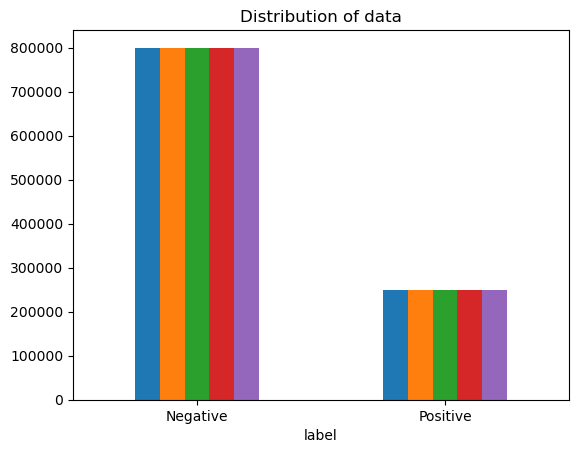

In [20]:
# Plotting the distribution for dataset.
ax = df.groupby('label').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['label'])
plt.show()

<AxesSubplot:xlabel='label', ylabel='count'>

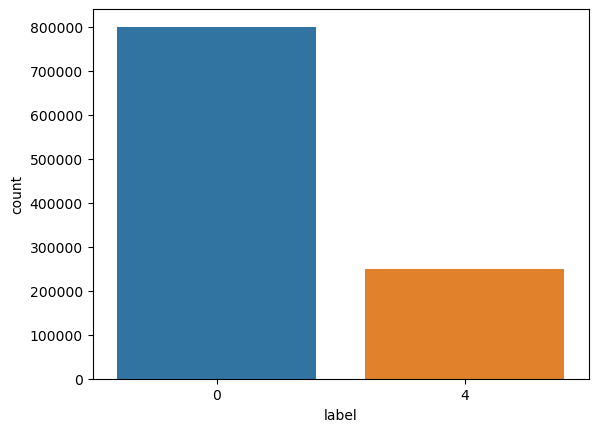

In [21]:
import seaborn as sns
sns.countplot(x='label', data=df)

#  Data Preprocessing

In [22]:
#Selecting the text and Target column 
df=df[['text','label']]

In [23]:
df.head()

,text,label
0,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",0
1,is upset that he can't update his Facebook by ...,0
2,@Kenichan I dived many times for the ball. Man...,0
3,my whole body feels itchy and like its on fire,0
4,"@nationwideclass no, it's not behaving at all....",0


In [24]:
#Replacing the values (Assigning 1 to Positive sentiment 4)
df['label'] = df['label'].replace(4,1)

In [25]:
df['label'].unique()

array([0, 1], dtype=int64)

In [26]:
# Separating positive and negative tweets
data_pos = df[df['label'] == 1]
data_neg = df[df['label'] == 0]

In [27]:
# Combining positive and negative tweets
dataset = pd.concat([data_pos, data_neg])
dataset.head()

,text,label
800000,I LOVE @Health4UandPets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@DaRealSunisaKim Thanks for the Twitter add, S...",1
800003,Being sick can be really cheap when it hurts t...,1
800004,@LovesBrooklyn2 he has that effect on everyone,1


In [28]:
# Making statement text in lowercase
dataset['text']=dataset['text'].str.lower()
dataset['text'].tail()

799995    sick  spending my day laying in bed listening ...
799996                                      gmail is down? 
799997                        rest in peace farrah! so sad 
799998    @eric_urbane sounds like a rival is flagging y...
799999    has to resit exams over summer...  wishes he w...
Name: text, dtype: object

In [29]:
# Removing URLs
def remove_url(text):
    return re.sub(r'https?://\S+|www\.\S+', '', text)
dataset['text'] = dataset['text'].apply(remove_url)
dataset.head()

,text,label
800000,i love @health4uandpets u guys r the best!!,1
800001,im meeting up with one of my besties tonight! ...,1
800002,"@darealsunisakim thanks for the twitter add, s...",1
800003,being sick can be really cheap when it hurts t...,1
800004,@lovesbrooklyn2 he has that effect on everyone,1


In [30]:
# Removing punctuations
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [31]:
def remove_punctuations(text):
    punctuations=string.punctuation
    return text.translate(str.maketrans('','',punctuations))
dataset['text']=dataset['text'].apply(lambda x: remove_punctuations(x))
dataset.head()

,text,label
800000,i love health4uandpets u guys r the best,1
800001,im meeting up with one of my besties tonight c...,1
800002,darealsunisakim thanks for the twitter add sun...,1
800003,being sick can be really cheap when it hurts t...,1
800004,lovesbrooklyn2 he has that effect on everyone,1


In [32]:
from nltk.corpus import stopwords
", ".join(stopwords.words('english'))

"i, me, my, myself, we, our, ours, ourselves, you, you're, you've, you'll, you'd, your, yours, yourself, yourselves, he, him, his, himself, she, she's, her, hers, herself, it, it's, its, itself, they, them, their, theirs, themselves, what, which, who, whom, this, that, that'll, these, those, am, is, are, was, were, be, been, being, have, has, had, having, do, does, did, doing, a, an, the, and, but, if, or, because, as, until, while, of, at, by, for, with, about, against, between, into, through, during, before, after, above, below, to, from, up, down, in, out, on, off, over, under, again, further, then, once, here, there, when, where, why, how, all, any, both, each, few, more, most, other, some, such, no, nor, not, only, own, same, so, than, too, very, s, t, can, will, just, don, don't, should, should've, now, d, ll, m, o, re, ve, y, ain, aren, aren't, couldn, couldn't, didn, didn't, doesn, doesn't, hadn, hadn't, hasn, hasn't, haven, haven't, isn, isn't, ma, mightn, mightn't, mustn, mus

In [33]:
STOPWORDS=set(stopwords.words('english'))
def remove_stopwords(text):
    return " ".join([word for word in text.split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda x: remove_stopwords(x))
dataset.head()

,text,label
800000,love health4uandpets u guys r best,1
800001,im meeting one besties tonight cant wait girl ...,1
800002,darealsunisakim thanks twitter add sunisa got ...,1
800003,sick really cheap hurts much eat real food plu...,1
800004,lovesbrooklyn2 effect everyone,1


In [34]:
Stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
                 'and', 'any', 'are', 'as', 'at', 'be', 'because', 'been', 'before',
                 'being', 'below', 'between', 'both', 'by', 'can', 'd', 'did', 'do',
                 'does', 'doing', 'down', 'during', 'each', 'few', 'for', 'from',
                 'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
                 'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
                 'into', 'is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
                 'me', 'more', 'most', 'my', 'myself', 'now', 'o', 'of', 'on', 'once',
                 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'own', 're', 
                 's', 'same', 'she', "shes", 'should', "shouldve", 'so', 'some', 'such',
                 't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
                 'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
                 'through', 'to', 'too', 'under', 'until', 'up', 've', 'very', 'was',
                 'we', 'were', 'what', 'when', 'where', 'which', 'while', 'who', 'whom',
                 'why', 'will', 'with', 'won', 'y', 'you', "youd", "youll", "youre",
                 "youve", 'your', 'yours', 'yourself', 'yourselves', 'isnt', 'ha', 'ya', 'im',
                 'a\'s', 'able', 'about', 'above', 'according', 'accordingly', 'across',
                 'actually', 'after', 'afterwards', 'again', 'against', 'ain\'t', 'all',
                 'allow', 'allows', 'almost', 'alone', 'along', 'already', 'also',
                 'although', 'always', 'am', 'among', 'amongst', 'an', 'and', 'another',
                 'any', 'anybody', 'anyhow', 'anyone', 'anything', 'anyway', 'anyways',
                 'anywhere', 'apart', 'appear', 'appreciate', 'appropriate', 'are', 'aren\'t',
                 'around', 'as', 'aside', 'ask', 'asking', 'associated', 'at', 'available',
                 'away', 'awfully', 'be', 'became', 'because', 'become', 'becomes', 'becoming',
                 'been', 'before', 'beforehand', 'behind', 'being', 'believe', 'below',
                 'beside', 'besides', 'best', 'better', 'between', 'beyond', 'both', 'bottom',
                 'brief', 'but', 'by', 'c\'mon', 'c\'s', 'came', 'can', 'can\'t', 'cannot',
                 'cant', 'cause', 'causes', 'certain', 'certainly', 'changes', 'clearly',
                 'co', 'com', 'come', 'comes', 'concerning', 'consequently', 'consider',
                 'considering', 'contain', 'containing', 'contains', 'corresponding',
                 'could', 'couldn\'t', 'course', 'currently', 'definitely', 'described',
                 'despite', 'did', 'didn\'t', 'different', 'do', 'does', 'doesn\'t', 'doing',
                 'don\'t', 'done', 'down', 'downwards', 'during', 'each', 'edu', 'eg',
                 'eight', 'either', 'else', 'elsewhere', 'enough', 'entirely', 'especially',
                 'et', 'etc', 'even', 'ever', 'every', 'everybody', 'everyone', 'everything',
                 'everywhere', 'ex', 'exactly', 'example', 'except', 'far', 'few', 'fifth',
                 'first', 'five', 'followed', 'following', 'follows', 'for', 'former',
                 'formerly', 'forth', 'four', 'from', 'further', 'furthermore', 'get', 'gets',
                 'getting', 'given', 'gives', 'go', 'goes', 'going', 'gone', 'got', 'gotten',
                 'greetings', 'had', 'hadn\'t', 'happens', 'hardly', 'has', 'hasn\'t', 'have',
                 'haven\'t', 'having', 'he', 'he\'s', 'hello', 'help', 'hence', 'her', 'here',
                 'here\'s', 'hereafter', 'hereby', 'herein', 'hereupon', 'hers', 'herself',
                 'hi', 'him', 'himself', 'his', 'hither', 'hopefully', 'how', 'howbeit',
                 'however', 'i', 'i\'d', 'i\'ll', 'i\'m', 'i\'ve', 'ie', 'if', 'ignored',
                 'immediate', 'in', 'inasmuch', 'inc', 'indeed', 'indicate', 'indicated',
                 'indicates', 'inner', 'insofar', 'instead', 'into', 'inward', 'is', 'isn\'t',
                 'it', 'it\'d', 'it\'ll', 'it\'s', 'its', 'itself', 'just', 'keep', 'keeps',
                 'kept', 'know', 'knows', 'known', 'last', 'lately', 'later', 'latter',
                 'latterly', 'least', 'less', 'lest', 'let', 'let\'s', 'like', 'liked',
                 'likely', 'little', 'look', 'looking', 'looks', 'ltd', 'mainly', 'many',
                 'may', 'maybe', 'me', 'mean', 'meanwhile', 'merely', 'might', 'more', 'moreover',
                 'most', 'mostly', 'much', 'must', 'my', 'myself', 'name', 'namely', 'nd',
                 'near', 'nearly', 'necessary', 'need', 'needs', 'neither', 'never',
                 'nevertheless', 'new', 'next', 'nine', 'no', 'nobody', 'non', 'none',
                 'noone', 'nor', 'normally', 'not', 'nothing', 'novel', 'now', 'nowhere',
                 'obviously', 'of', 'off', 'often', 'oh', 'ok', 'okay', 'old', 'on', 'once',
                 'one', 'ones', 'only', 'onto', 'or', 'other', 'others', 'otherwise', 'ought',
                 'our', 'ours', 'ourselves', 'out', 'outside', 'over', 'overall', 'own',
                 'particular', 'particularly', 'per', 'perhaps', 'placed', 'please', 'plus',
                 'possible', 'presumably', 'probably', 'provides', 'que', 'quite', 'qv', 'rather',
                 'rd', 're', 'really', 'reasonably', 'regarding', 'regardless', 'regards',
                 'relatively', 'respectively', 'right', 'said', 'same', 'saw', 'say', 'saying',
                 'says', 'second', 'secondly', 'see', 'seeing', 'seem', 'seemed', 'seeming',
                 'seems', 'seen', 'self', 'selves', 'sensible', 'sent', 'serious', 'seriously',
                 'seven', 'several', 'shall', 'shan\'t', 'she', 'she\'d', 'she\'ll', 'she\'s',
                 'should', 'shouldn\'t', 'since', 'six', 'so', 'some', 'somebody', 'somehow',
                 'someone', 'something', 'sometime', 'sometimes', 'somewhat', 'somewhere', 'soon',
                 'sorry', 'specified', 'specify', 'specifying', 'still', 'sub', 'such', 'sup',
                 'sure', 't\'s', 'take', 'taken', 'tell', 'tends', 'th', 'than', 'thank',
                 'thanks', 'thanx', 'that', 'that\'s', 'thats', 'the', 'their', 'theirs', 'them',
                 'themselves', 'then', 'thence', 'there', 'there\'s', 'thereafter', 'thereby',
                 'therefore', 'therein', 'theres', 'thereupon', 'these', 'they', 'they\'d',
                 'they\'ll', 'they\'re', 'they\'ve', 'think', 'third', 'this', 'thorough',
                 'thoroughly', 'those', 'though', 'three', 'through', 'throughout', 'thru',
                 'thus', 'to', 'together', 'too', 'took', 'toward', 'towards', 'tried', 'tries',
                 'truly', 'try', 'trying', 'twice', 'two', 'un', 'under', 'unfortunately',
                 'unless', 'unlikely', 'until', 'unto', 'up', 'upon', 'us', 'use', 'used',
                 'useful', 'uses', 'using', 'usually', 'value', 'various', 'very', 'via', 'viz',
                 'vs', 'want', 'wants', 'was', 'wasn\'t', 'way', 'we', 'we\'d', 'we\'ll', 'we\'re',
                 'we\'ve', 'welcome', 'well', 'went', 'were', 'weren\'t', 'what', 'what\'s',
                 'whatever', 'when', 'whence', 'whenever', 'where', 'where\'s', 'whereafter',
                 'whereas', 'whereby', 'wherein', 'whereupon', 'wherever', 'whether', 'which',
                 'while', 'whither', 'who', 'who\'s', 'whoever', 'whole', 'whom', 'whose', 'why',
                 'will', 'willing', 'wish', 'with', 'within', 'without', 'won\'t', 'wonder',
                 'would', 'wouldn\'t', 'yes', 'yet', 'you', 'you\'d', 'you\'ll', 'you\'re',
                 'you\'ve', 'your', 'yours', 'yourself', 'yourselves', 'isnt', 'ha', 'ya', 'im',
                 'don\'t', 'should\'ve', 'couldn\'t', 'wouldn\'t', 'mustn\'t', 'ain\'t', 'aren\'t',
                 'can\'t', 'could\'ve', 'didn\'t', 'doesn\'t', 'hadn\'t', 'hasn\'t', 'haven\'t',
                 'isn\'t', 'might\'ve', 'must\'ve', 'needn\'t', 'shan\'t', 'shouldn\'t', 'wasn\'t',
                 'weren\'t', 'won\'t', 'wouldn\'t', 'you\'d', 'you\'ll', 'you\'re', 'you\'ve','u','r','lot','bit','xxx','ooh',
                 'lol','aww','wont','ive','till','til','dont','didnt','haha','damm','wow','yea','couldnt','wanna','gonna','aint']


In [35]:
STOPWORDS = set(Stopwordlist)
dataset['text'] = dataset['text'].apply(lambda x: remove_stopwords(x))
dataset.head()

,text,label
800000,love health4uandpets guys,1
800001,meeting besties tonight wait girl talk,1
800002,darealsunisakim twitter add sunisa meet hin sh...,1
800003,sick cheap hurts eat real food friends make soup,1
800004,lovesbrooklyn2 effect,1


In [36]:
# Removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset.tail()

,text,label
799995,sick spending day laying bed listening taylors...,0
799996,gmail,0
799997,rest peace farrah sad,0
799998,ericurbane sounds rival flagging ads,0
799999,resit exams summer wishes worked harder year uni,0


In [37]:
# Removing numeric numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset.tail()

,text,label
799995,sick spending day laying bed listening taylorswif,0
799996,gmail,0
799997,rest peace farrah sad,0
799998,ericurbane sounds rival flagging ads,0
799999,resit exams summer wishes worked harder year uni,0


In [38]:
from collections import Counter #occurrences of elements in a collection.
word_count=Counter() # initialized as a Counter object. 
for text in dataset['text']:
    for word in text.split():
        word_count[word]+=1
RARE_WORDS=set(word for (word, wc) in word_count.most_common()[:-1000:-1])
", ".join(RARE_WORDS)

'girllllllllll, sadshes, jendalyn, momoneybiggy, stimulacra, lbda, eagene, coastalliving, tnccinsd, craapppy, suavez, spearslol, wiiskey, \x7fhumorless, annablackaby, soooooooooooooooooooooooooo, ruperte, nicokwanart, ishtudei, apettite, discourses, beingmoving, hopeformusic, jobsgreat, streetwizemag, mrpilat, sages, roxannejean, arnes, amfinished, conciousi, granffathers, boater, followerlame, nggreenguide, fawcettrest, yeptht, documentatiemap, intvu, wizpig, daydreamwriter, faekae, diddystweet, couragous, ahnothing, rudemins, libraryworking, ismackyourass, krisgarvey, wimledon, emokidbastian, jeezyfosheezy, rosstrich, ignitechange, jelez, creditgrade, janportfolio, prettyyymess, sonicreducer, tooshe, jenngonzalez, frows, ossagen, maurensoares, judithbailey, readyalthough, lawrencedenes, freeeeeeeeeeee, andrewcilleytmailcom, passwork, donecuz, yuyu, hahahahaing, inreal, keskiyo, biscuitmil, niccidgaf, travling, gljufura, eveningthen, graemeainslie, chibimarrow, farraw, jimmuncie, nows

In [39]:
def remove_rare_words(text):
    return" ".join([word for word in text.split() if word not in RARE_WORDS])
dataset['text'] = dataset['text'].apply(lambda x: remove_rare_words(x))
dataset.head()

,text,label
800000,love healthuandpets guys,1
800001,meeting besties tonight wait girl talk,1
800002,darealsunisakim twitter add sunisa meet hin sh...,1
800003,sick cheap hurts eat real food friends make soup,1
800004,lovesbrooklyn effect,1


In [40]:
def remove_spl_chars(text):
    text=re.sub('[^a-zA-Z0-9]', " ", text)
    text=re.sub('\s+', ' ', text)
    return text
dataset['text'] = dataset['text'].apply(lambda x: remove_spl_chars(x))
dataset.head()

,text,label
800000,love healthuandpets guys,1
800001,meeting besties tonight wait girl talk,1
800002,darealsunisakim twitter add sunisa meet hin sh...,1
800003,sick cheap hurts eat real food friends make soup,1
800004,lovesbrooklyn effect,1


In [41]:
# Getting tokenization of tweet text

from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'\w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset.head()

,text,label
800000,"[love, healthuandpets, guys]",1
800001,"[meeting, besties, tonight, wait, girl, talk]",1
800002,"[darealsunisakim, twitter, add, sunisa, meet, ...",1
800003,"[sick, cheap, hurts, eat, real, food, friends,...",1
800004,"[lovesbrooklyn, effect]",1


In [42]:
# Applying stemming

from nltk.stem.porter import PorterStemmer
st = PorterStemmer()
def stem_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stem_text(x))
dataset.head()

,text,label
800000,"[love, healthuandpets, guys]",1
800001,"[meeting, besties, tonight, wait, girl, talk]",1
800002,"[darealsunisakim, twitter, add, sunisa, meet, ...",1
800003,"[sick, cheap, hurts, eat, real, food, friends,...",1
800004,"[lovesbrooklyn, effect]",1


In [43]:
# Applying lemmatizer

from nltk import pos_tag # determine the Part-Of-Speech (POS) tags for each word in the text
from nltk.corpus import wordnet #  map POS tags to WordNet's synset categories
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
wordnet_map = {"N": wordnet.NOUN, "V": wordnet.VERB, "J": wordnet.ADJ, "R": wordnet.ADV}

def lemmatize_words(word_list):
    # find pos tags
    pos_text = pos_tag(word_list)
    return " ".join([lemmatizer.lemmatize(word, wordnet_map.get(pos[0], wordnet.NOUN)) for word, pos in pos_text])

dataset['text'] = dataset['text'].apply(lemmatize_words)
dataset.head()

,text,label
800000,love healthuandpets guy,1
800001,meet besties tonight wait girl talk,1
800002,darealsunisakim twitter add sunisa meet hin sh...,1
800003,sick cheap hurt eat real food friend make soup,1
800004,lovesbrooklyn effect,1


In [44]:
# Separating input feature and label
X=dataset.text
y=dataset.label

# Plot a cloud of words for negative tweets

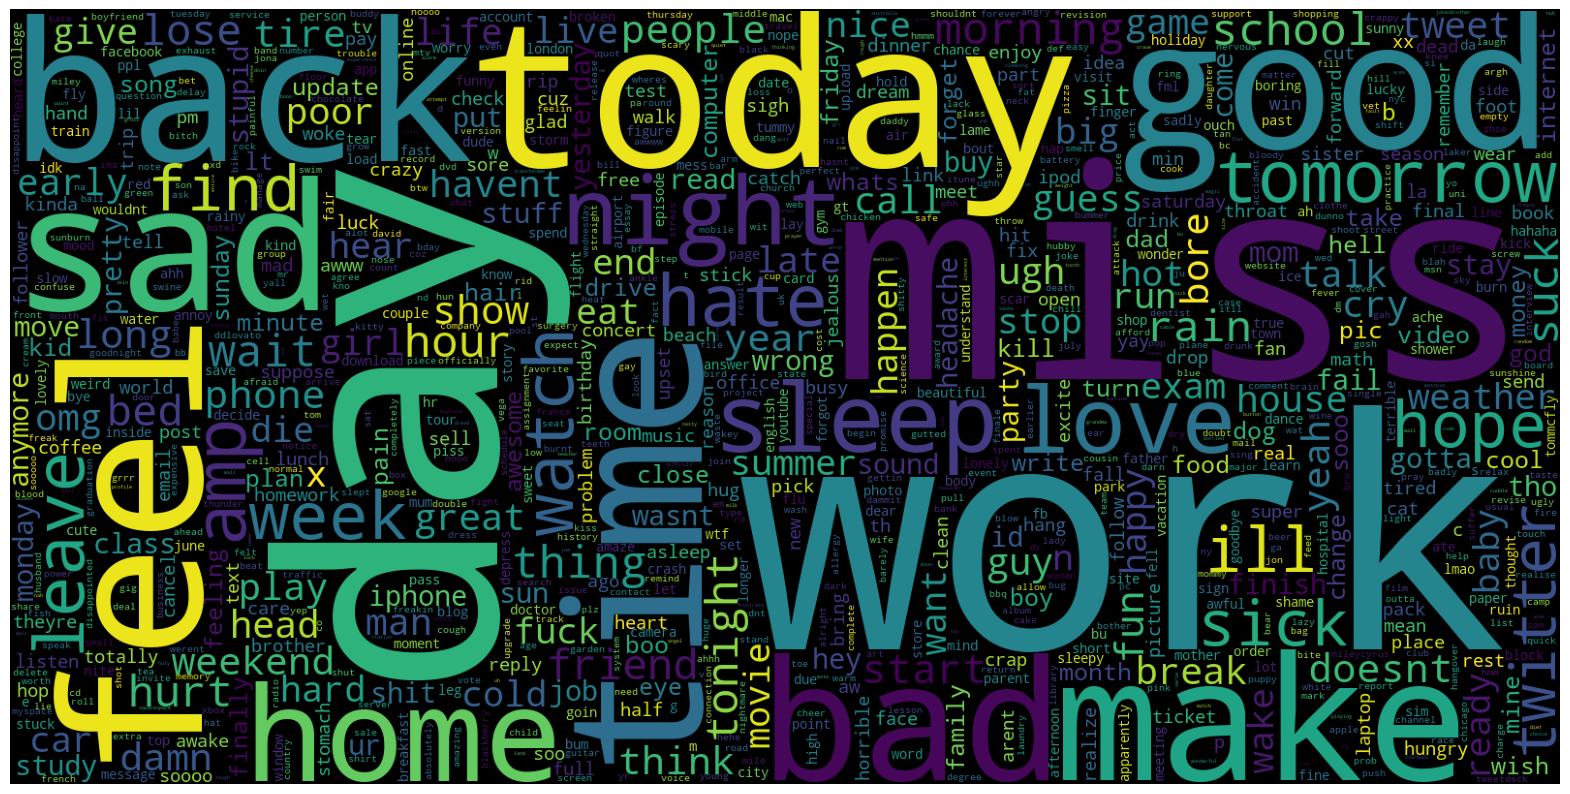

In [45]:
data_neg = dataset[dataset['label'] == 0]
plt.figure(figsize=(20, 20)) # plot area for the Word Cloud.
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_neg['text']))
plt.imshow(wc)
plt.axis("off")
plt.show()


# Plot a cloud of words for positive tweets

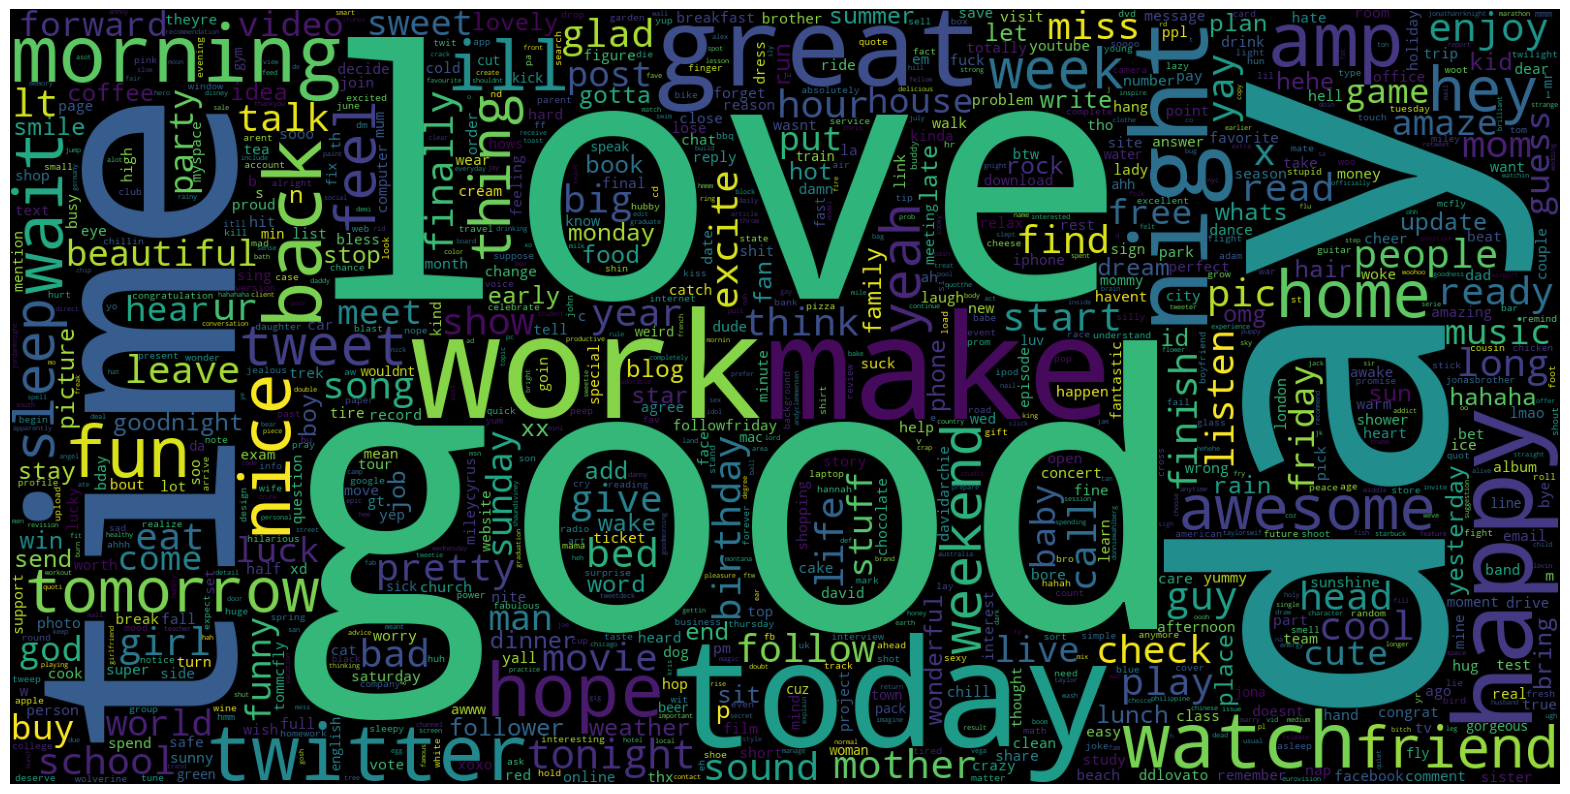

In [46]:
data_pos = dataset[dataset['label'] == 1]
plt.figure(figsize=(20, 20))
wc = WordCloud(max_words=1000, width=1600, height=800, collocations=False).generate(" ".join(data_pos['text']))
plt.imshow(wc)
plt.axis("off")
plt.show()

In [47]:
# Separating the 95% data for training data and 5% for testing data
# scikit-learn 
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [48]:
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
#performs text vectorization using TF-IDF (Term Frequency-Inverse Document Frequency)
# Create the TfidfVectorizer
vectorizer = TfidfVectorizer(ngram_range=(1, 2), max_features=1000000)

# Fit the vectorizer on the training data
X_train_tfidf = vectorizer.fit_transform(X_train)
# fit_transform method calculates the TF-IDF weights for each word in the training data and returns a sparse matrix

# Get the feature names
feature_names = vectorizer.get_feature_names_out()

# Print the number of feature words
print('No. of feature words: ', len(feature_names)) #  total number of unique words and bigrams

No. of feature words:  1000000


# Transform the data using TF-IDF Vectorizer

In [49]:
X_train = vectorizer.transform(X_train) #Transform the text data  into its TF-IDF representation. 
X_test  = vectorizer.transform(X_test)

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

def model_Evaluate(model):
    # Predict values for Test dataset
    y_pred = model.predict(X_test)
    # Print the evaluation metrics for the dataset.
    print(classification_report(y_test, y_pred)) # includes precision, recall, F1-score, and support for each class
    # Compute and plot the Confusion matrix
    cf_matrix = confusion_matrix(y_test, y_pred)
    categories = ['Negative', 'Positive']
    group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names, group_percentages)]
    labels = np.asarray(labels).reshape(2, 2)
    sns.heatmap(cf_matrix, annot=labels, cmap='Blues', fmt='',
                xticklabels=categories, yticklabels=categories)
    plt.xlabel("Predicted values", fontdict={'size': 14}, labelpad=10)
    plt.ylabel("Actual values", fontdict={'size': 14}, labelpad=10)
    plt.title("Confusion Matrix", fontdict={'size': 18}, pad=20)
    plt.show()  # Show the confusion matrix plot

# Bernoulli Naive Bayes Classifier

              precision    recall  f1-score   support

           0       0.81      0.96      0.88     39949
           1       0.69      0.26      0.38     12480

    accuracy                           0.80     52429
   macro avg       0.75      0.61      0.63     52429
weighted avg       0.78      0.80      0.76     52429



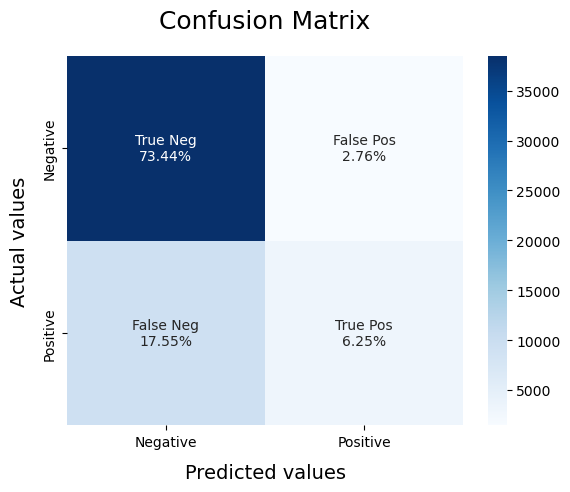

In [51]:
BNBmodel = BernoulliNB()  #assumes that the features (TF-IDF values) are binary (0 or 1
BNBmodel.fit(X_train, y_train) # Train using X_train as input features and y_train as target labels
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

#Precision = TP / (TP + FP)
# Recall = TP / (TP + FN)

# Plot the ROC-AUC Curve

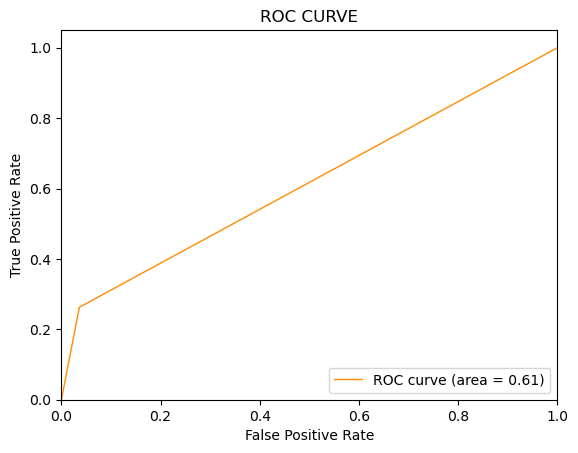

In [52]:
from sklearn.metrics import roc_curve,  # from sklearn.metrics import roc_curve, auc
#fpr represents the false positive rates, tpr represents the true positive rates, 
#and thresholds contains the thresholds used to generate the ROC curve.
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
# Set the x-axis and y-axis limits.
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()


# SVM (Support Vector Machine)

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     39949
           1       0.64      0.47      0.54     12480

    accuracy                           0.81     52429
   macro avg       0.74      0.69      0.71     52429
weighted avg       0.80      0.81      0.80     52429



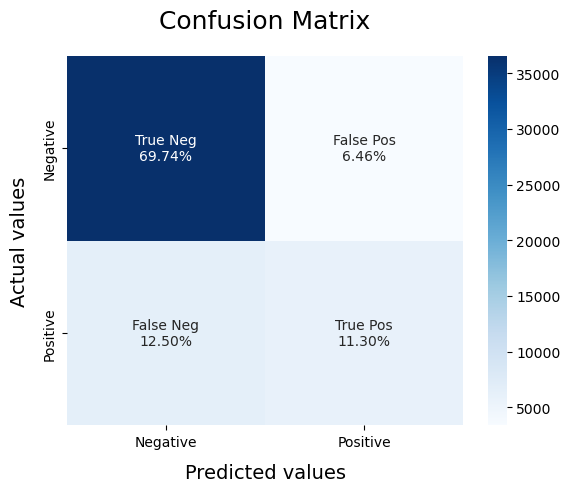

In [58]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

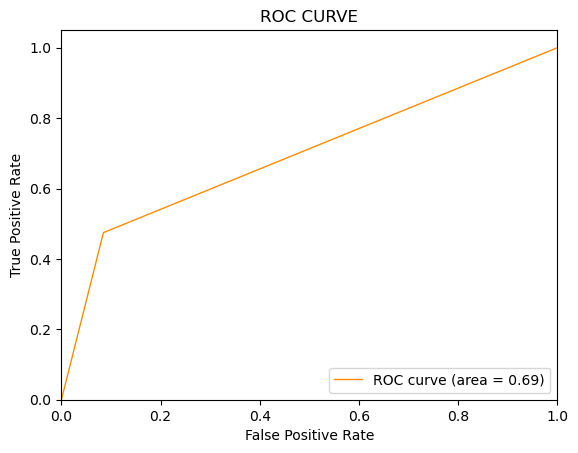

In [59]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

# Logistic Regression

              precision    recall  f1-score   support

           0       0.84      0.93      0.89     39949
           1       0.68      0.45      0.54     12480

    accuracy                           0.82     52429
   macro avg       0.76      0.69      0.71     52429
weighted avg       0.81      0.82      0.81     52429



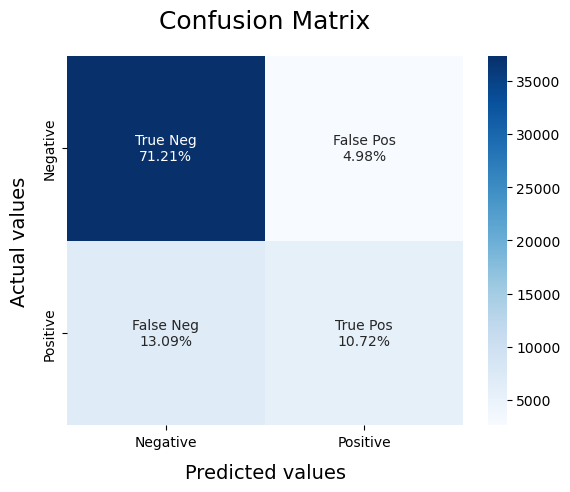

In [60]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)



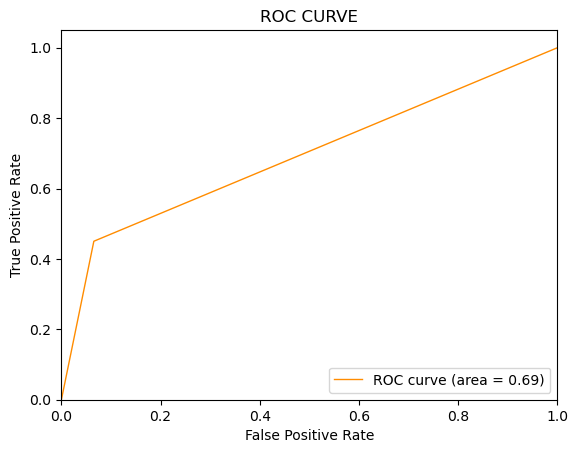

In [61]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# The TPR is calculated as TP / (TP + FN), 
# and the FPR is calculated as FP / (FP + TN).